# Лабораторная работа №1

*Выполнила Филиппова Вероника, НКнбд-01-18*

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as mpatches
from matplotlib import animation as animation
import sympy
from sympy import init_printing
from IPython.display import display

## Задание 1
Написать программу, которая рисует произвольный многоугольник по заданным координатам
всех его вершин.

1. *Задайте координаты точек в виде списка (тип list) кортежей (тип tuple). Затем преобразуйте
это список в массив NumPy*

In [2]:
vertices  = [(-2, 4), (6, 7), (5, -1), (4, -5), (-3, 0)] # объявляю вершины
np_vertices  = np.array(vertices)

2. *Координаты (𝑥, 𝑦) произвольной 𝑖-ой вершины*

In [3]:
x = np_vertices[:, 0]
y = np_vertices[:, 1]

3. *Нарисуйте многоугольник в декартовой системе координат*
4. *Выделите вершины многоугольника маркерными точками*

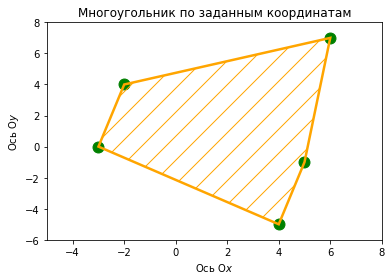

In [4]:
fig = plt.figure(num=1)
pntgn = fig.add_subplot(1, 1, 1)
pntgn.set_xlim(-5, 8)
pntgn.set_ylim(-6, 8)
pntgn.set_title("Многоугольник по заданным координатам")
pntgn.set_xlabel(r'Ось O$x$')
pntgn.set_ylabel(r'Ось O$y$')
#pntgn.grid() #сетка

polygon = mpatches.Polygon(xy=vertices, closed=True, fill=False, linestyle="-", linewidth="2.5", color="orange", hatch='/')
pntgn.add_patch(polygon)

pntgn.scatter(x, y, c="green", s=120, marker="o")

## Задание 2
Написать программу, которая рисует правильный многоугольник с центром в заданной точке, а также вписанную и описанную окружности этого многоугольника. Количество сторон правильного $n$-угольника и длину его стороны нужно задать в виде параметра. Вместо длины стороны можно использовать радиус $r$ вписанной или радиус $R$ описанной окружностей.


- Пусть $R$ - радиус описанной вокруг правильного многоугольника окружности, тогда радиус вписанной окружности равен $r=R \cdot \cos \frac{\pi}{n}$, а длина стороны многоугольника равна $a=2 R \cdot \sin \frac{\pi}{n}$

In [5]:
def regular_polygon(xy, n, a):

    fig = plt.figure(num=1, figsize=(10,10))
    nplgn = fig.add_subplot(1, 1, 1) 
    nplgn.set_title("Правильный многоугольник")
    nplgn.set_xlabel(r"Ось O$x$")
    nplgn.set_ylabel(r"Ось O$у$")
    nplgn.grid()

    
    alpha = np.radians(180/n)
    R = a/(2*np.sin(alpha))
    r = R * np.cos(alpha)

    grid_scale = 2

    nplgn.set_xlim(left=xy[0] - R * grid_scale, right=xy[0] + R * grid_scale)
    nplgn.set_ylim(bottom=xy[1] - R * grid_scale, top=xy[1] + R * grid_scale)

    rpolygon = mpatches.RegularPolygon(xy, n, R, fill=False, linewidth=3)
    Rcircle = mpatches.Circle(xy, R, fill=False, color="red")
    rcircle = mpatches.Circle(xy, r, fill=False, color='blue')

    path = rpolygon.get_path()
    vert = path.vertices
    trans = rpolygon.get_patch_transform()
    points = trans.transform(vert)

    nplgn.add_patch(rpolygon)
    nplgn.add_patch(Rcircle)
    nplgn.add_patch(rcircle)
    nplgn.plot(points[:, 0], points[:, 1], 'bo')

    for i in range(len(points[:-1])):
        nplgn.text(x=1.2 * points[i, 0], y=1.2 * points[i, 1], s=f"$P_{i}$", verticalalignment='center', horizontalalignment='center',
                 fontstyle="italic", fontsize=20)

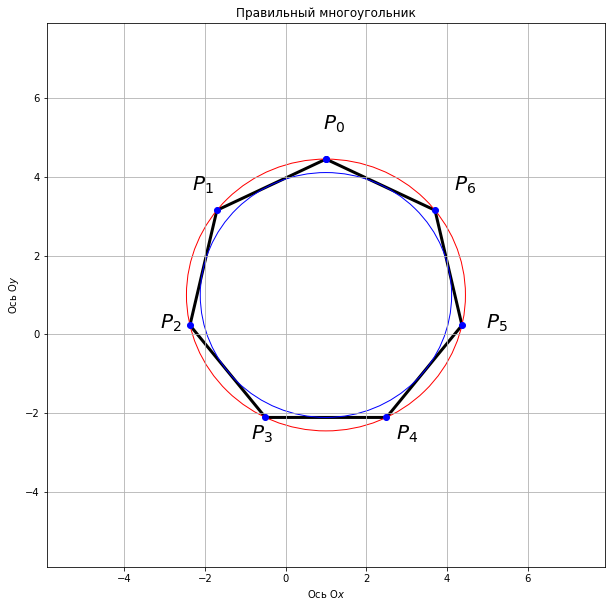

In [6]:
regular_polygon(np.array([1, 1]), 7, 3)

## Задание №3
Нарисуйте график циклоиды для двух полных оборотов окружности. Отобразите поле касательных векторов к данному графику. Уравнение циклоиды:
$$
\left\{\begin{array}{l}
x(t)=r(t-\sin t) \\
y(t)=r(1-\cos t)
\end{array}\right.
$$

NameError: name 'pdx' is not defined

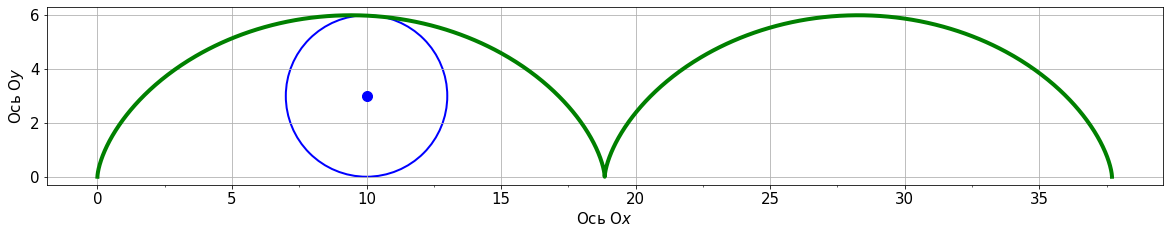

In [7]:
r = 3
s = 500

t = np.linspace(0, 4*np.pi, 1000) # Функция linspace() возвращает одномерный массив из указанного количества элементов, 
#значения которых равномерно распределенны внутри заданного интервала
x = r * (t - np.sin(t))
y = r * (1 - np.cos(t))
dx = r * (1 - np.cos(t))
dy = r * (1-np.sin(t))


# График
fig = plt.figure(figsize=(20,20)) # cоздала область Figure 
ax = fig.add_subplot(1,1,1) # добавила к Figure область Axes

ax.set_ylabel(r"Ось О$y$", fontsize=15)
ax.set_xlabel(r"Ось О$x$", fontsize=15)

# Вспомогательная сетка
ax.tick_params(axis='both', which='minor', labelsize=15) 
ax.tick_params(axis='both', which='major', labelsize=15)

# Устанавливаю интервал вспомогательных делений:
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

ax.grid()
ax.set_aspect('equal')

circle = mpatches.Circle([10, r], r, color="blue", fill=False, lw=2)

ax.plot(x, y, color='green', label="Циклоида", lw=4)

ax.add_patch(circle)

ax.plot(10, r, 'bo', markersize=10)

#Стрелки
ax.quiver(x[::20], y[::20], pdx, pdy, width=.004, minlength=.02, scale=350, label="Касательные векторы")
#Легенда
ax.legend(ncol=1, framealpha=.7, fontsize=15)

## Задание № 4
Нарисовать астроиду и ее эволюту.

- Астроидой называется кривая на плоскости, описываемая параметрическими уравнениями
$$
\begin{gathered}
x=R \cos ^{3} t \\
\mathrm{y}=\mathrm{R} \sin ^{3} \mathrm{t} \\
\end{gathered}
$$
- Эволюта астроиды подобна ей, но вдвое больше неё и повёрнута относительно неё на 45°.

In [8]:
# Вычислим аналитически формулы производных. 

R = 2

t = sympy.symbols("t") # Это для дифференциальных уравнений
sympy.init_printing(use_unicode=True) # Это способ получить правильный вывод
x0 = R * sympy.cos(t)**3
y0 = R * sympy.sin(t)**3

diff_x1 = sympy.diff(x0)
diff_y1 = sympy.diff(y0)

diff_x2 = sympy.diff(diff_x1)
diff_y2 = sympy.diff(diff_y1)

#display(diff_x1, diff_x2, diff_y1, diff_y2)


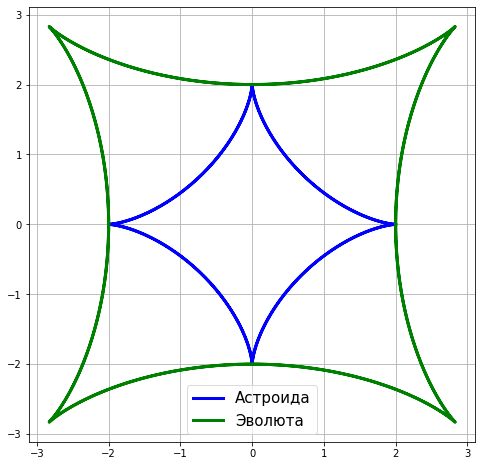

In [9]:
# График 
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.grid()

t = np.linspace(10e-6, 4*np.pi - 10e-6, 1000)
x = R * np.cos(t)**3
y = R * np.sin(t)**3

# Для изменения параметра выписала значения
diffx1 = -6*np.sin(t)*np.cos(t)**2
diffx2 = 12*np.sin(t)**2 * np.cos(t) - 6*np.cos(t)**3
diffy1 = 6*np.sin(t)**2 * np.cos(t)
diffy2 = -6*np.sin(t)**3 + 12*np.sin(t)*np.cos(t)**2

deltl = diffx1 * diffy2 - diffx2 * diffy1
sum2 = diffx1**2 + diffy1**2
# Эволюта астроиды
evltx = x - ( diffy1 * sum2 ) / deltl
evlty = y + ( diffx1 * sum2 ) / deltl

ax1.plot(x, y, color='blue', label="Астроида", lw=3 ) 
ax1.plot(evltx, evlty, color='green', label="Эволюта", lw=3)
ax1.legend(ncol=1, framealpha=.7, fontsize=15)

## Задание № 5
Нарисовать кривую, заданную суперформулой:
$$
r(\varphi)=\left(\left|\frac{\cos \left(\frac{m_{1} \varphi}{4}\right)}{a}\right|^{n_{2}}+\left|\frac{\sin \left(\frac{m_{2} \varphi}{4}\right)}{b}\right|^{n_{3}}\right)^{-\frac{1}{n_{1}}}
$$
где $m_{1}, m_{2}, n_{1}, n_{2}, n_{3}, a, b-$ параметры, принимающие значения из множества вещественных чисел.

- Формула задает кривую в полярных координатах, однако на рисунке должна отображаться сетка декартовых координат.
- Значения параметров $m_{1}, m_{2}, n_{1}, n_{2}, n_{3}, a, b$ должны отображаться в заголовке рисунка. Значения параметров берите из таблицы $1 .$

$$
\begin{array}{c|ccccccc}
\mathrm{N}_{0} & m_{1} & m_{2} & n_{1} & n_{2} & n_{3} & a & b \\
\hline 1 & 4 & 6 & 3 & 1 & 1 & 1 & 1 \\
2 & 6 & 3 & 2 & 1 & 1 & 1 & 1 \\
3 & 2 & 10 & 1.5 & 1 & 1 & 1 & 1 \\
4 & 2 & 10 & -1.5 & 1 & 1 & 1 & 1 \\
5 & 2 & 44 & -0.2 & 1 & 1 & 1 & 1 \\
6 & 8 & 40 & -0.2 & 1 & 1 & 1 & 1 \\
7 & 88 & 64 & 3 & 1 & 1 & 1 & 1 \\
8 & 88 & 64 & -20 & 1 & 1 & 1 & 1
\end{array}
$$

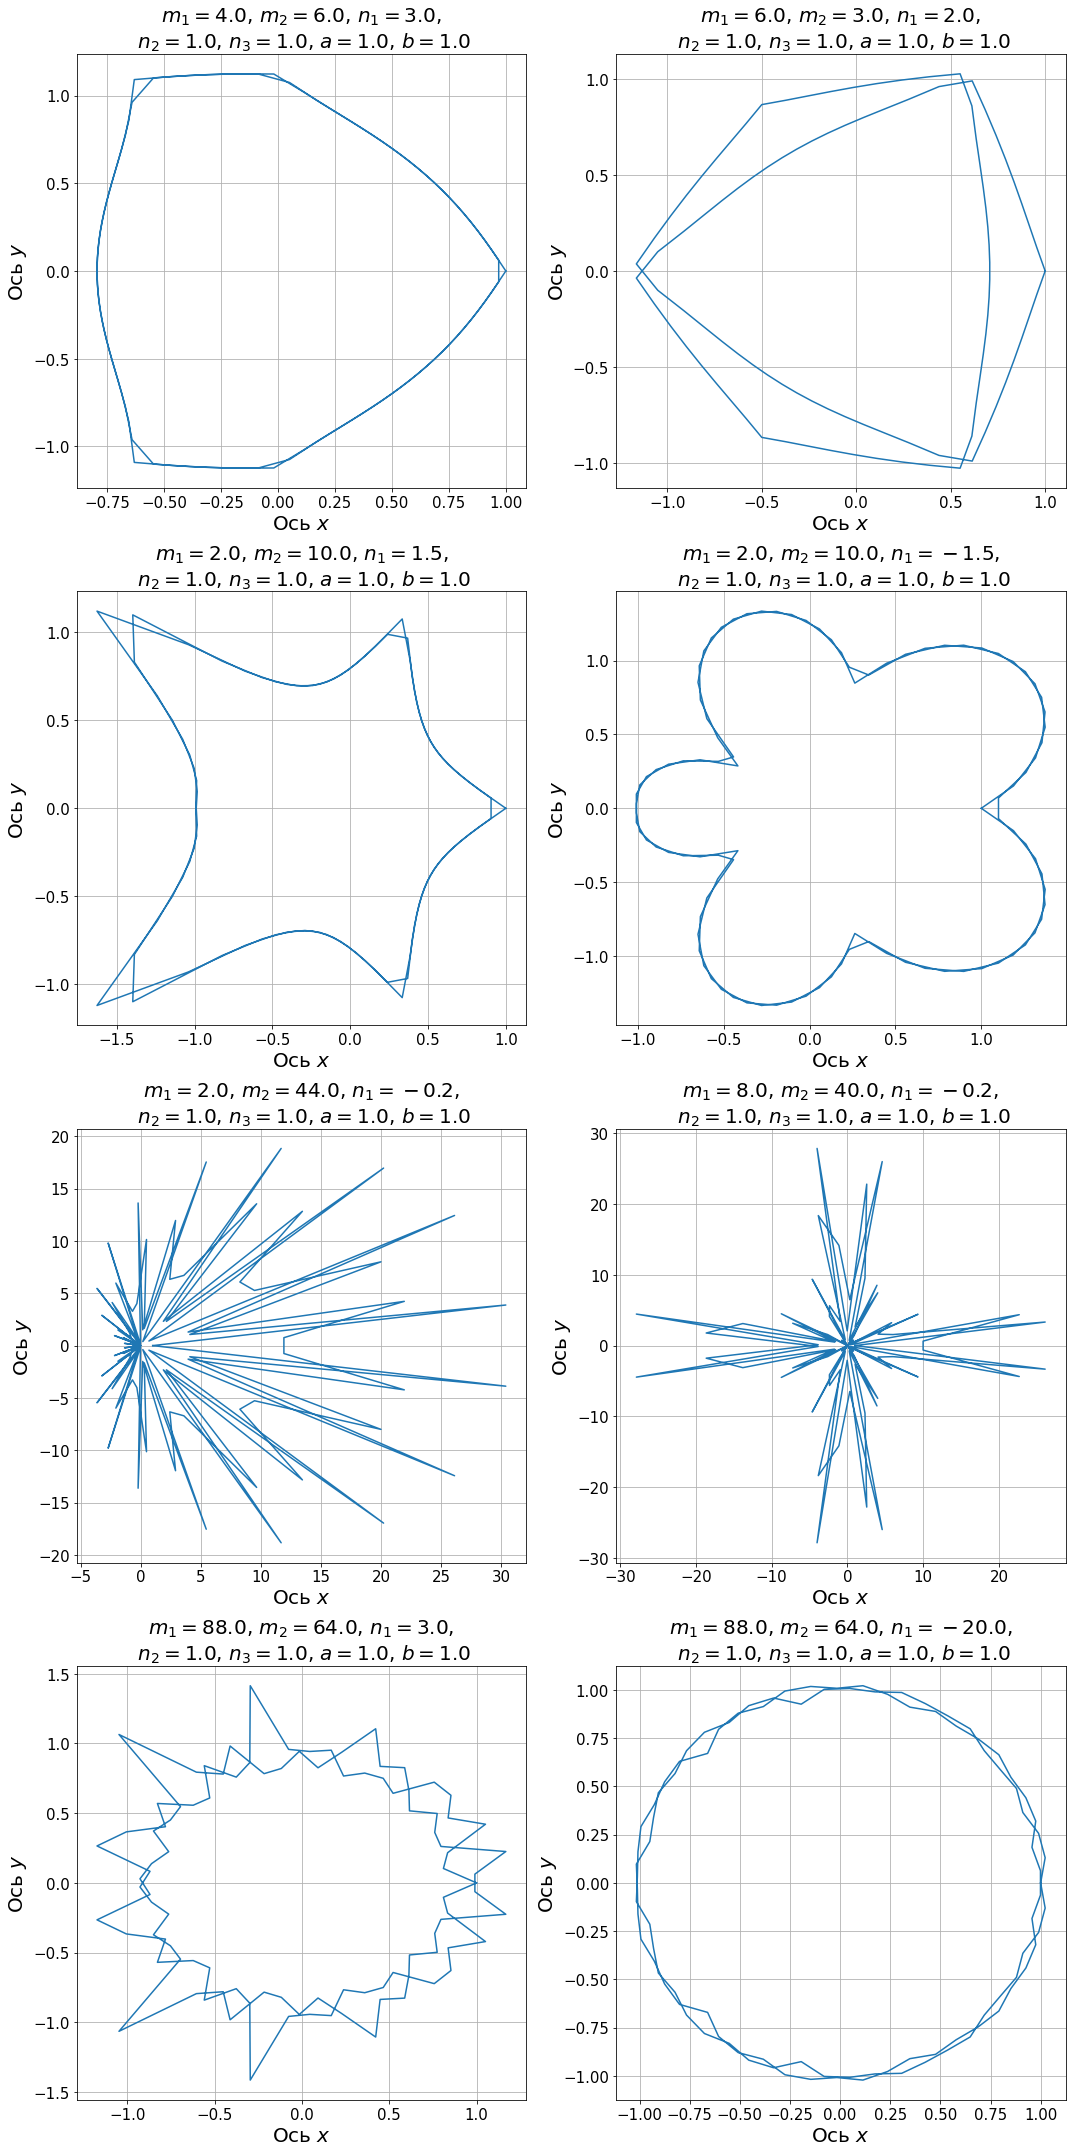

In [10]:
fig = plt.figure(figsize=(15,30))
a = 2
args = np.array([[4, 6, 3, 1, 1, 1, 1],
                 [6, 3, 2, 1, 1, 1, 1],
                 [2, 10, 1.5, 1, 1, 1, 1],
                 [2, 10, -1.5, 1, 1, 1, 1],
                 [2, 44, -0.2, 1, 1, 1, 1],
                 [8, 40, -0.2, 1, 1, 1, 1],
                 [88, 64, 3, 1, 1, 1, 1],
                 [88, 64, -20, 1, 1, 1, 1]])

for i, x in enumerate(args):
    m1, m2, n1, n2, n3, a, b = args[i]
    fi = np.linspace(0, 4*np.pi, 100)
    r = ( np.abs(np.cos(m1*fi/4/a))**n2 + np.abs(np.sin(m2*fi/4)/b)**n3 )**( -1/n1 )
    x = r * np.cos(fi)
    y = r * np.sin(fi)
    
    ax = fig.add_subplot(4,2,i+1)
    ax.grid()
    ax.plot(x, y)
    
    ax.set_ylabel(r"Ось $y$", fontsize=20)
    ax.set_xlabel(r"Ось $x$", fontsize=20)
    ax.set_title(f"$m_1={m1}$, $m_2={m2}$, $n_1={n1}$,\n $n_2={n2}$, $n_3={n3}$, $a={a}$, $b={b}$", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()# Автоматически настраивает подзаголовок таким образом, чтобы он вписывался в область рисунка.

## Задание № 6
Частным случаем суперформулы является _суперэллипс_ или _кривая Ламе_. В неявном виде в декартовых координатах он задается уравнением:
$$
\left|\frac{x}{a}\right|^{n}+\left|\frac{x}{b}\right|^{n}=1, n, a, b>0
$$

Параметрическое представление:
$$
\begin{aligned}
&x(t)=\pm a \cos ^{\frac{2}{n}} t \\
&y(t)=\pm b \sin ^{\frac{2}{n}} t
\end{aligned}
$$
где параметр $t \in[0, \pi / 2) .$ Постройте суперэллипс, его нормальные векторы $\mathbf{n}(t)$ и кривую $k(t) \cdot \mathbf{n}(t)$, где $k(t)-$ кривизна в точке $(x(t), y(t)) .$ 

In [11]:
t, a, b, n = sympy.symbols("t, a, b, n") # Это для записи дифференциальных уравнений

n = 4
a = 1
b = 1
# Вычисление производных
sympy.init_printing(use_unicode=True)
x0 = a * sympy.cos(t)**(2/n)
y0 = a * sympy.sin(t)**(2/n)

diffx01 = sympy.diff(x0)
diffx02 = sympy.diff(diffx01)
diffy01 = sympy.diff(y0)
diffy02 = sympy.diff(diffy01)


#display(diffx01, diffx02, diffy01, diffy02)


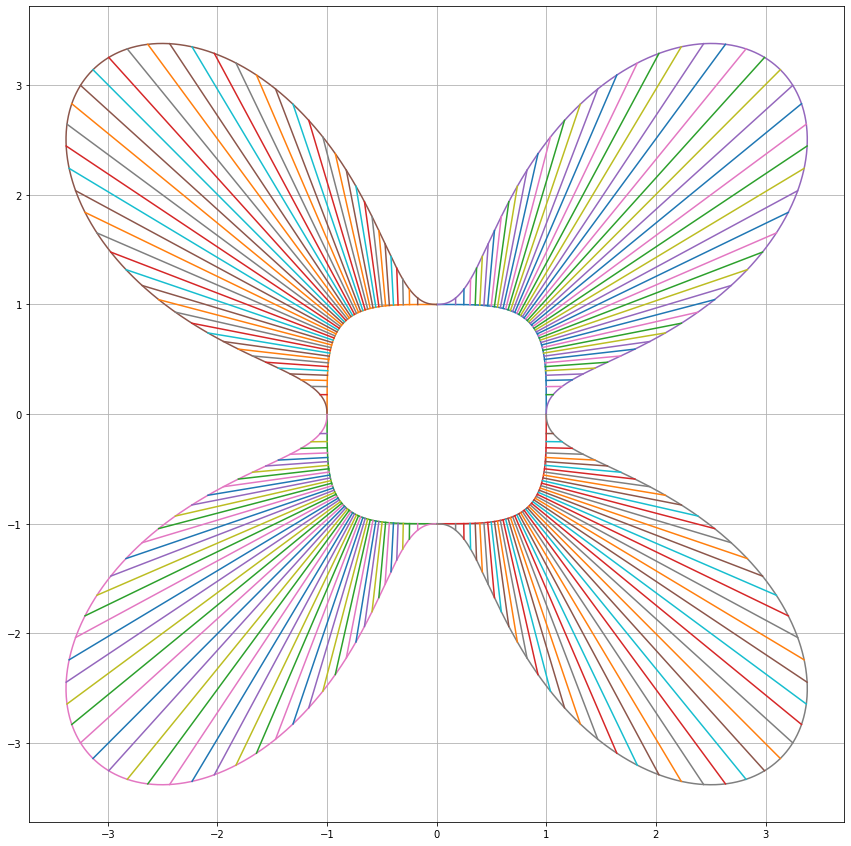

In [12]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1, 1, 1)
ax.grid() # Сетка
ax.set_aspect('equal')

n = 4
a = 1
b = 1

t = np.linspace(10e-6, np.pi/2-10e-6, 1000)

x = a * np.cos(t)**(2/n)
y = b * np.sin(t)**(2/n)

diffx1 = -0.4*np.sin(t)/np.cos(t)**(.6)
diffx2 = -0.24*np.sin(t)**2/np.cos(t)**(1.6) - 0.4*np.cos(t)**.4
diffy1 = .4*np.cos(t)/np.sin(t)**.6
diffy2 = -.24*np.cos(t)**2/np.sin(t)**1.6 - .4*np.sin(t)**.4

# Вычислим кривизну
curvtr = ( diffx1*diffy2 - diffx2*diffy1 ) / ( diffx1**2 + diffy1**2 ) ** (3/2)

# Нормированный вектор нормали
normX = -diffy1 / np.hypot(diffx1, diffy1)
normY = diffx1 / np.hypot(diffx1, diffy1)
 
# Смещение полученного умножения вектора нормали на значение кривизны результат на (x,y)

curvtrX = -curvtr * normX + x
curvtrY = -curvtr * normY + y

# Построение графиков
ax.plot(x, y)
ax.plot(-x, y)
ax.plot(-x, -y)
ax.plot(x, -y)

ax.plot(curvtrX, curvtrY)
ax.plot(-curvtrX, curvtrY)
ax.plot(-curvtrX, -curvtrY)
ax.plot(curvtrX, -curvtrY)

# Линии нормали.
for i in range(0, len(x), 20):
    px = np.array([x[i], curvtrX[i]])
    py = np.array([y[i], curvtrY[i]])
    ax.plot(px, py)
    ax.plot(-px, py)
    ax.plot(-px, -py)
    ax.plot(px, -py)